# Exercise for the 3rd course week

## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ,gender, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file (Each student can appear on multiple lines): 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis 
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## Ex 2 Exceptions (extra)
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

## Ex 3 Plotting (extra)
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


In [1]:
%matplotlib notebook
import random
import csv
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt


class Course:
    def __init__(self, name, classroom, teacher, ECTS, grade = None): 
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ECTS = ECTS
        self.grade = int(grade)
        
class DataSheet:
    
    def __init__(self, courses = None):
        self.courses = courses if courses else []
    
    def get_grades_as_list(self):
        course_grades = []
        for course in self.courses:
            if course.grade != None:
                course_grades.append(course.grade)
        return course_grades 
    
    def add_course(self, course):
        self.courses.append(course)
      
    def remove_all_courses(self):
        self.courses = []
    
class Student:
        
    def __init__(self,name, gender, image_url, data_sheet = None):
        self.name = name
        self.gender  = gender
        self.image_url = image_url
        self.data_sheet = data_sheet
    
    @property
    def get_avg_grade(self):
        for grade in self.data_sheet.get_grades_as_list():
            if(grade == None):
                break
        if(len(self.data_sheet.get_grades_as_list()) <= 0):
            return "No grades"
        grades_sum = sum(self.data_sheet.get_grades_as_list())
        num_of_grades = len(self.data_sheet.get_grades_as_list())
        return grades_sum/num_of_grades
        
    def set_data_sheet(self, data_sheet):
        self.data_sheet = data_sheet
    
    def __str__(self):
        return str("Name: "+ self.name + ", Gender: " + self.gender + ", Image: " + self. image_url + ", " + self.get_avg_grade())

# 1.9 Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
    @property
    def progression(self):
        sum_ECTS = sum([int(courses.ECTS) for courses in self.data_sheet.courses])
        percent = sum_ECTS/150
        return percent*100
    
names = ["Dennis", "Kasper", "Cathrine", "Miw", "Peter"]
genders = ["Male", "Female"]
grades = [-3, 0, 2, 4, 7, 10, 12]
courses1 = [Course("Math",1.23, "Sylvester Stalone", 40, grades[random.randrange(0, len(grades))]), Course("Science",2.22, "Harry Potter", 30, grades[random.randrange(0, len(grades))]), Course("Python",3.23, "Thomas Hartmann", 50, grades[random.randrange(0, len(grades))])]

data_sheet_test = DataSheet(courses1)
#print(str(data_sheet_test.get_grades_as_list())) # for test
student_test = Student(names[random.randrange(0,len(names))], genders[random.randrange(0,len(genders))], "https://heartbeats.dk/wp-content/uploads/2019/10/kisscc0-internet-troll-rage-comic-trollface-internet-meme-troll-face-problem-5b7784b8b72715.3526863615345594167502-e1545057228317.png", data_sheet_test)
#print(str(student_test.get_avg_grade())) # for test

In [2]:
#1.7 Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
#1.7.A Let the function write the result to a csv file with format stud_name, course_name, teacher, ,gender, ects, classroom, grade, img_url

def write_students(amount):
    students_list = []
    for i in range(1,amount+1):
        data_sheet1 = DataSheet()
        for j in range(0,random.randrange(1,len(courses1)+1)):
            data_sheet1.add_course(courses1[j])
        student1 = Student(names[random.randrange(0,len(names))], genders[random.randrange(0,len(genders))], "https://heartbeats.dk/wp-content/uploads/2019/10/kisscc0-internet-troll-rage-comic-trollface-internet-meme-troll-face-problem-5b7784b8b72715.3526863615345594167502-e1545057228317.png", data_sheet1)
        students_list.append(student1)
    with open('students_at_random.csv', 'w',encoding='UTF8') as f:
        writer = csv.writer(f)
        for student2 in students_list:
            writer.writerow([student2.name, student2.gender, student2.image_url])
            for course in student2.data_sheet.courses:
                writer.writerow([course.name, course.classroom, course.teacher, course.ECTS, course.grade, student2.name+"_"+student2.gender])
write_students(3)

In [3]:
#1.8 Read student data into a list of Students from a csv file (Each student can appear on multiple lines):
#1.8.A loop through the list and print each student with name, img_url and avg_grade.
#1.8.B sort the list by avg_grade

from operator import attrgetter

def read_students():
    courses_with_id = []
    students_total = []
    grade_times_100 = 0
    file_contain = ""
    with open('students_at_random.csv', 'r') as file0:
        students = [Student(row.split(",")[0], row.split(",")[1], row.split(",")[2]) for row in file0 if len(row.split(",")) <= 3]
    with open('students_at_random.csv', 'r') as file:
        for line in file:
            file_contain += str(line)
        file_contain_list1 = file_contain.split("\n")
        file_contain_list = [attr.split(",") for attr in file_contain_list1]
        datasheet_attr = [attr for attr in file_contain_list if len(attr) == 6]
        for student_123 in students:
            datasheet2 = DataSheet()
            for row in datasheet_attr:
                if (str(student_123.name+"_"+student_123.gender) == str(row[5])):
                    datasheet2.add_course(Course(row[0], row[1], row[2], row[3], row[4]))
            student_123.set_data_sheet(datasheet2)
            students_total.append(student_123)
    students_sorted = sorted(students_total, key=lambda student : student.get_avg_grade, reverse=True)
    for student in students_sorted:
        txt = "{name:s} has a avarage grade: {grade}"
        print(txt.format(name=student.name, grade=student.get_avg_grade))
        print(student.name + " looks like: " + student.image_url)
    return students_sorted
        
read_students()

Kasper has a avarage grade: 7.0
Kasper looks like: https://heartbeats.dk/wp-content/uploads/2019/10/kisscc0-internet-troll-rage-comic-trollface-internet-meme-troll-face-problem-5b7784b8b72715.3526863615345594167502-e1545057228317.png

Kasper has a avarage grade: 2.0
Kasper looks like: https://heartbeats.dk/wp-content/uploads/2019/10/kisscc0-internet-troll-rage-comic-trollface-internet-meme-troll-face-problem-5b7784b8b72715.3526863615345594167502-e1545057228317.png

Peter has a avarage grade: 2.0
Peter looks like: https://heartbeats.dk/wp-content/uploads/2019/10/kisscc0-internet-troll-rage-comic-trollface-internet-meme-troll-face-problem-5b7784b8b72715.3526863615345594167502-e1545057228317.png



In [7]:
#1.8.C create a bar chart with student_name on x and avg_grade on y-axis

import matplotlib.pyplot as plt
import pandas as pd

def chart_for_avg_grade(students):
    Data = {'names': [str(student.name) for student in students],
            'avg grades': [student.get_avg_grade for student in students]
           }

    df = pd.DataFrame(Data,columns=['names','avg grades'])

    New_Colors = ['green','blue','purple','brown','teal']
    plt.bar(df['names'], df['avg grades'], color=New_Colors)

    plt.title('Students with avarage grades')
    plt.xlabel('names')
    plt.ylabel('avg grades')

    plt.gca().invert_xaxis()

    plt.show()
    
chart_for_avg_grade(read_students())

Kasper has a avarage grade: 7.0
Kasper looks like: https://heartbeats.dk/wp-content/uploads/2019/10/kisscc0-internet-troll-rage-comic-trollface-internet-meme-troll-face-problem-5b7784b8b72715.3526863615345594167502-e1545057228317.png

Kasper has a avarage grade: 2.0
Kasper looks like: https://heartbeats.dk/wp-content/uploads/2019/10/kisscc0-internet-troll-rage-comic-trollface-internet-meme-troll-face-problem-5b7784b8b72715.3526863615345594167502-e1545057228317.png

Peter has a avarage grade: 2.0
Peter looks like: https://heartbeats.dk/wp-content/uploads/2019/10/kisscc0-internet-troll-rage-comic-trollface-internet-meme-troll-face-problem-5b7784b8b72715.3526863615345594167502-e1545057228317.png



Kasper has a avarage grade: 7.0
Kasper looks like: https://heartbeats.dk/wp-content/uploads/2019/10/kisscc0-internet-troll-rage-comic-trollface-internet-meme-troll-face-problem-5b7784b8b72715.3526863615345594167502-e1545057228317.png

Kasper has a avarage grade: 2.0
Kasper looks like: https://heartbeats.dk/wp-content/uploads/2019/10/kisscc0-internet-troll-rage-comic-trollface-internet-meme-troll-face-problem-5b7784b8b72715.3526863615345594167502-e1545057228317.png

Peter has a avarage grade: 2.0
Peter looks like: https://heartbeats.dk/wp-content/uploads/2019/10/kisscc0-internet-troll-rage-comic-trollface-internet-meme-troll-face-problem-5b7784b8b72715.3526863615345594167502-e1545057228317.png

26.666666666666668
46.666666666666664
80.0


<IPython.core.display.Javascript object>


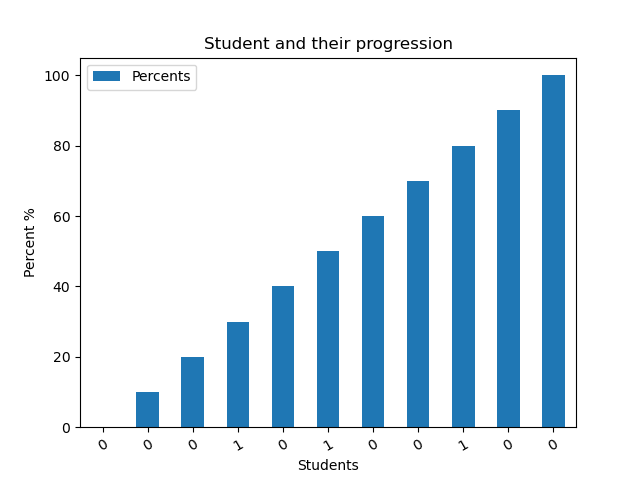

In [11]:
#1.10 Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

import matplotlib.pyplot as plt
import pandas as pd

def chart_for_progression(students):
    percent_cat = [percents for percents in range(0,101,10)]
    count = 0
    students_qnty = []
    for percent in percent_cat:
        for student in students:
            if student.progression <= percent:
                print(student.progression)
                count=count+1
                students.remove(student)
        students_qnty.append(count)
        count=0
    df = pd.DataFrame({'Students': students_qnty, 'Percents':percent_cat})
    df.plot(x="Students", y="Percents", kind="bar")
    plt.xticks(rotation=30, horizontalalignment="center")
    plt.title('Student and their progression')
    plt.xlabel("Students")
    plt.ylabel("Percent %")
    plt.show()
    
chart_for_progression(read_students())